## Testi Python with Git

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


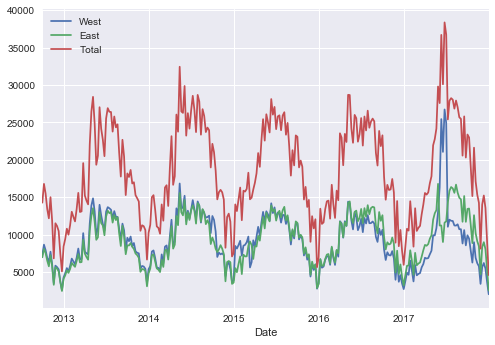

In [5]:
data.resample('W').sum().plot()

(0, 1059460.05)

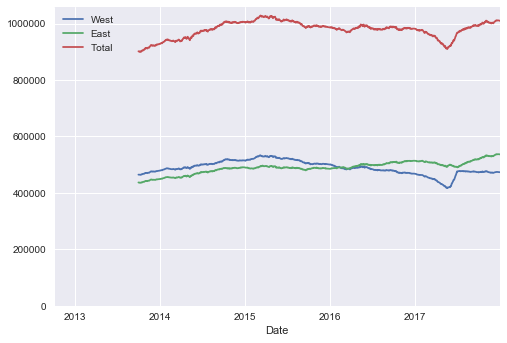

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

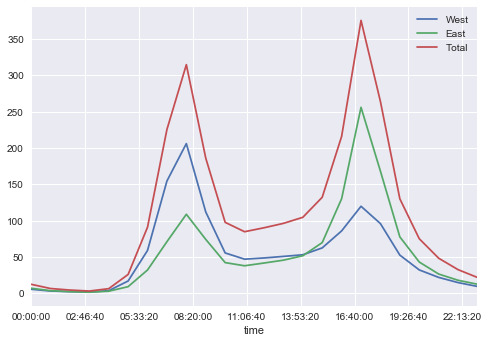

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


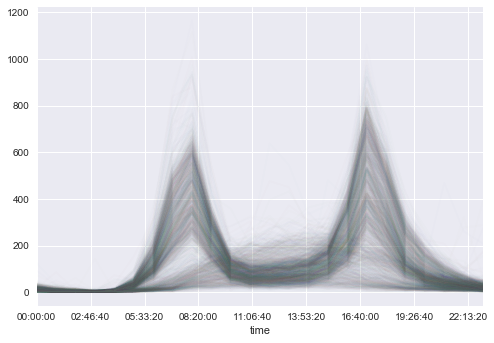

In [9]:
pivoted.plot(legend=False, alpha=0.01)

In [20]:
get_fremont_data??

In [11]:
X = pivoted.fillna(0).T
print(X.head())

            00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
2012-10-03      13.0      10.0       2.0       5.0       7.0      31.0   
2012-10-04      18.0       3.0       9.0       3.0       8.0      26.0   
2012-10-05      11.0       8.0       7.0       4.0       9.0      25.0   
2012-10-06      15.0      15.0       9.0       3.0       5.0       5.0   
2012-10-07      11.0      17.0       3.0       6.0       3.0       9.0   

            06:00:00  07:00:00  08:00:00  09:00:00    ...     14:00:00  \
2012-10-03     155.0     352.0     437.0     276.0    ...        128.0   
2012-10-04     142.0     319.0     418.0     241.0    ...        119.0   
2012-10-05     105.0     319.0     370.0     212.0    ...        125.0   
2012-10-06      27.0      33.0     105.0     114.0    ...        203.0   
2012-10-07      17.0      26.0      69.0     103.0    ...        241.0   

            15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
2012-10-03     164.0     315.0     5

In [12]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [13]:
X2.shape

(1916, 2)

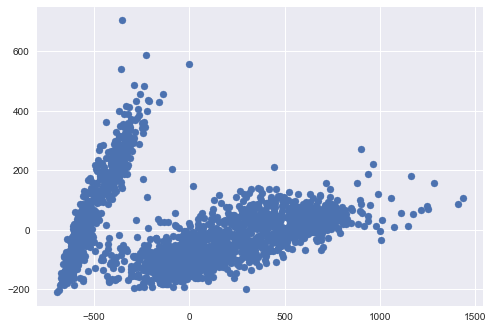

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

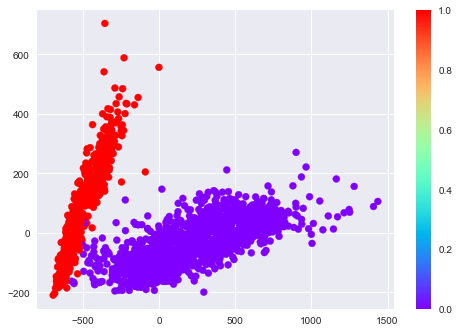

In [16]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

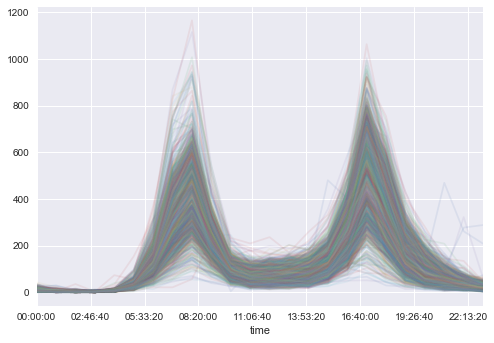

In [17]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

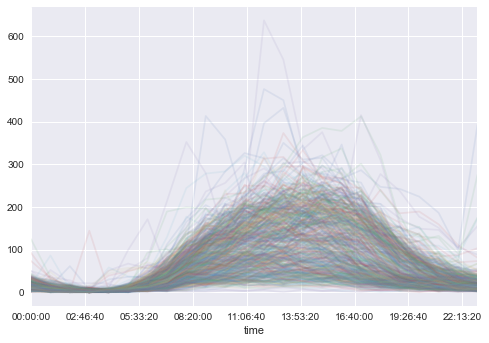

In [18]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

In [24]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

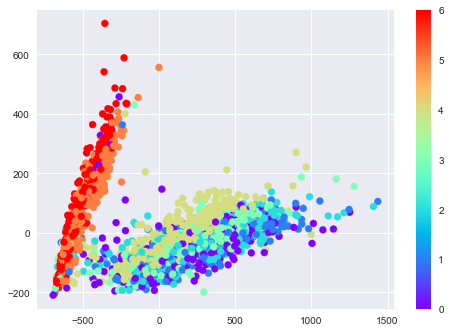

In [25]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [29]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26'],
              dtype='datetime64[ns]', freq=None)